In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
h08dir = '/home/kajiyama/H08/H08_20230612'
SUF = '.gl5'
tag = '.tk5'
dtype = 'float32'
gl5shape = (2160, 4320)

# tokyo region
# "138 141 34 38"
one = 138
two = 141
three = 34
four = 38
upperindex = (90-four)*12
lowerindex = (90-three)*12
leftindex = (180+one)*12
rightindex = (180+two)*12
print(upperindex, lowerindex, leftindex, rightindex)

624 672 3816 3852


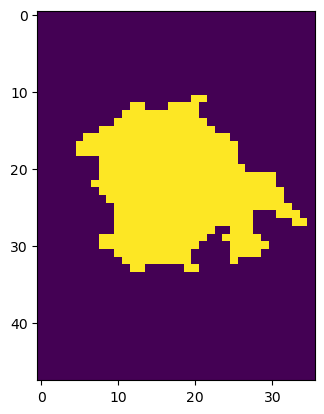

In [6]:
maskpath = h08dir + '/map/dat/lnd_msk_/lndmsk.CAMA.tk5'
lndmsk = np.fromfile(maskpath, dtype=dtype).reshape(48, 36)
plt.imshow(lndmsk)
plt.show()

In [9]:
cty_num = 1 # tokyo

ctymsk_load = f"{h08dir}/map/dat/cty_msk_/city_{cty_num:08}{SUF}"
ctyprf_load = f"{h08dir}/map/dat/cty_prf_/city_{cty_num:08}{SUF}"
ctyswg_load = f"{h08dir}/map/dat/cty_swg_/city_{cty_num:08}{SUF}"
ctyint_load = f"{h08dir}/map/dat/cty_int_/city_{cty_num:08}{SUF}"
load_list = [ctymsk_load, ctyprf_load, ctyswg_load, ctyint_load]

ctymsk_save = f"{h08dir}/map/dat/cty_msk_/city_{cty_num:08}{SUF}"
ctyprf_save = f"{h08dir}/map/dat/cty_prf_/city_{cty_num:08}{SUF}"
ctyswg_save = f"{h08dir}/map/dat/cty_swg_/city_{cty_num:08}{SUF}"
ctyint_save = f"{h08dir}/map/dat/cty_int_/city_{cty_num:08}{SUF}"
save_list = [ctymsk_save, ctyprf_save, ctyswg_save, ctyint_save]

In [126]:
# save the files
p0mis = 0

save_flag = False
if save_flag is True:
    for loadfile, savefile in zip(path_list_load, path_list_save):
        data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
        tokyo = data[upperindex:lowerindex, leftindex:rightindex]
        tokyo.astype(np.float32).tofile(savefile)
        tokyomasked = np.where(lndmsk==1, tokyo, p0mis)
        tokyomasked.astype(np.float32).tofile(savefile)

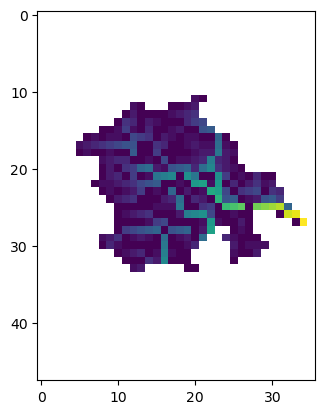

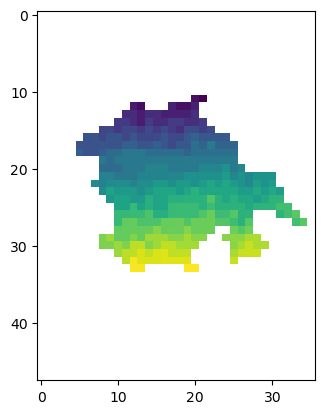

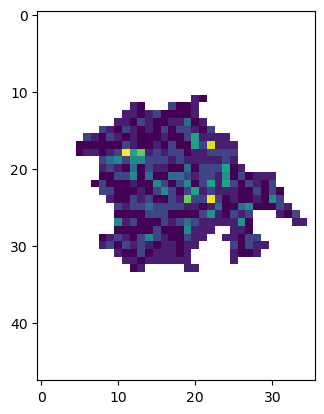

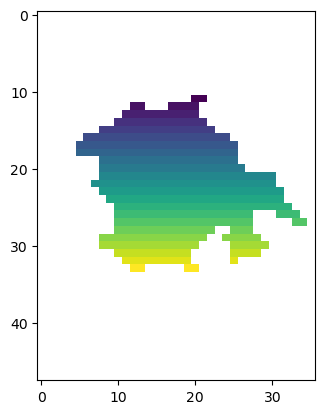

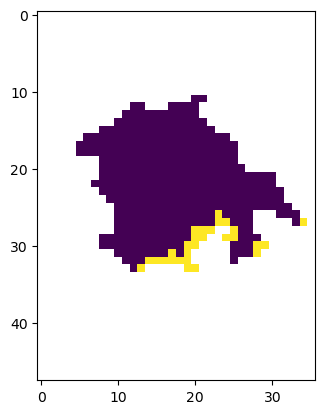

In [127]:
# view the files
tmppath = h08dir + '/map/out/riv_seq_/rivseq.CAMA.tk5'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(48, 36)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = h08dir + '/map/out/riv_nxl_/rivnxl.CAMA.tk5'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(48, 36)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = h08dir + '/map/out/riv_nxd_/rivnxd.CAMA.tk5'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(48, 36)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = h08dir + '/map/dat/lnd_ara_/lndara.CAMA.tk5'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(48, 36)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = h08dir + '/map/out/riv_mou_/rivmou.CAMA.tk5'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(48, 36)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()

In [128]:
# check rivermouse
for i in range(48):
    for j in range(36):
        if tmpnew[i,j] != 0.0 and tmpnew[i,j] != 1.0:
            print(tmpnew[i,j])

9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0


In [114]:
# これ間違っているコードなので使わないようにしてください

def region_l_coordinate(org_l):
    one = 138
    two = 141
    three = 34
    four = 38
    upperindex = (90-four)*12
    lowerindex = (90-three)*12
    leftindex = (180+one)*12
    rightindex = (180+two)*12
    
    nx = 4320
    nx_region = 36
    
    c = org_l
    a = c%nx
    b = c//nx

    new_y = b-upperindex
    new_x = a-leftindex
    
    new_l = new_y*nx_region + (new_x+1)
    return new_l

rivpath = h08dir + '/map/out/riv_nxl_/wrongcode.CAMA.tk5'
rivnxl = np.fromfile(rivpath, dtype=dtype).reshape(48, 36)

nx_region = 36
ny_region = 48

rivnxl_new=np.zeros((ny_region, nx_region))
count = 0
for i in range(48):
    for j in range(36):
        if rivnxl[i,j] != 0.0:
            rivnxl_new[i,j] = region_l_coordinate(rivnxl[i,j])
            #print(i, j, rivnxl_new[i,j])
            count += 1
        else:
            rivnxl_new[i,j] = 0.0

save_flag = False
if save_flag is True:
    rivnxl_path = f"{h08dir}/map/out/riv_nxl_/wrongcode.CAMA.tk5"
    rivnxl_new.astype(np.float32).tofile(rivnxl_path)
    
print(count)